In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(
    "https://www.nbi.dk/%7Ekoskinen/Teaching/AdvancedMethodsInAppliedStatistics2018/data/FranksNumbers.txt",
    delimiter="\t",
    names=["X", "Y"],
)
data = data.drop(0)
idx_rows = data[data["X"].str.contains("Data set")].index.to_list()
idx_rows.append(data.index[-1] + 1)
data_list = []
for i in range(len(idx_rows) - 1):
    data_set = data.loc[idx_rows[i] + 1 : idx_rows[i + 1] - 1].reset_index(drop=True)
    data_set = data_set.apply(pd.to_numeric)
    data_list.append(data_set)

X_means = [df["X"].mean() for df in data_list]
X_vars = [df["X"].var() for df in data_list]

Y_means = [df["Y"].mean() for df in data_list]
Y_vars = [df["Y"].var() for df in data_list]

In [3]:
r = 5.2
N = 100_000


def area_calc(r, N):
    x = np.random.uniform(-r, r, N)
    y = np.random.uniform(-r, r, N)

    accept_mask = (x**2 + y**2) <= r**2
    reject_mask = (x**2 + y**2) > r**2

    x_rejected = x[reject_mask]
    y_rejected = y[reject_mask]
    x_accepted = x[accept_mask]
    y_accepted = y[accept_mask]

    pi_estimate = 4 * len(y_accepted) / N
    area_estimate = pi_estimate * r**2
    return x_rejected, y_rejected, x_accepted, y_accepted, pi_estimate, area_estimate


x_rejected, y_rejected, x_accepted, y_accepted, pi_estimate, area_estimate = area_calc(
    r, N
)

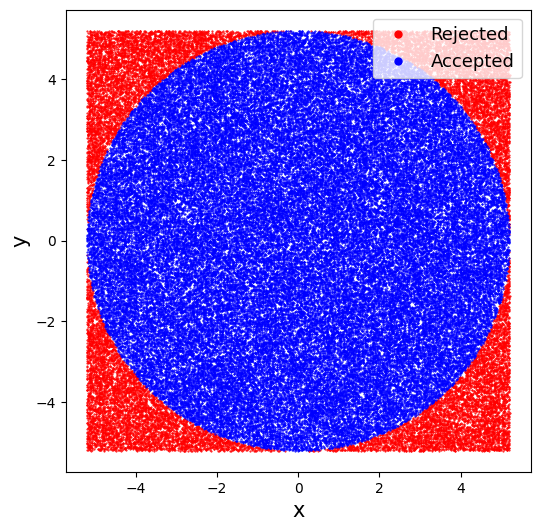

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(x_rejected, y_rejected, ".", color="red", label="Rejected", markersize=1)
plt.plot(x_accepted, y_accepted, ".", color="blue", label="Accepted", markersize=1)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend(fontsize=13, markerscale=10)
plt.show()

In [5]:
print(f"\nEstimate of pi using {N} points: {pi_estimate}")
print(f"\nEstimate of area using {N} points: {area_estimate}")


Estimate of pi using 100000 points: 3.14348

Estimate of area using 100000 points: 84.99969920000001


In [6]:
N1 = 100
N_trials = 1000
areas = []
amin, amax = 62, 98
bin_widths = np.array([0.1, 1, 3])
n_bins = np.round((amax - amin) / bin_widths)
for i in range(N_trials):
    areas.append(area_calc(r, N1)[-1])

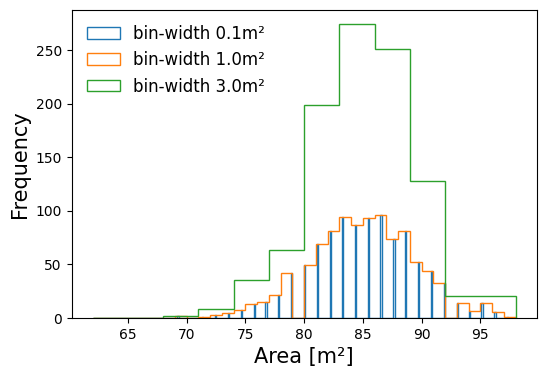

In [10]:
plt.figure(figsize=(6, 4))
for idx, bins in enumerate(n_bins):
    plt.hist(
        areas,
        range=(amin, amax),
        bins=int(bins),
        label=f"bin-width {bin_widths[idx]}m²",
        histtype="step",
    )
plt.xlabel("Area [m²]", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend(fontsize=12, frameon=False)
plt.show()

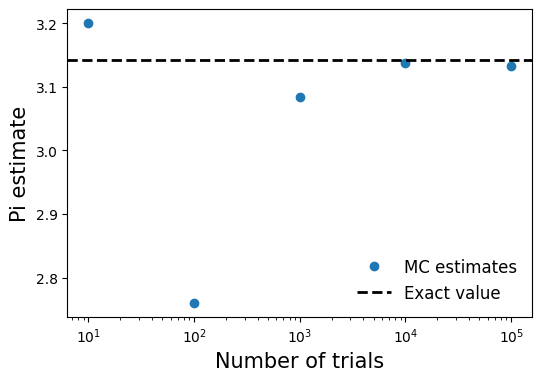

In [11]:
throws = np.logspace(1, 5, 5)
pi_values = [area_calc(r, int(throw))[-2] for throw in throws]
plt.figure(figsize=(6, 4))
plt.plot(throws, pi_values, "o", label="MC estimates")
plt.xlabel("Number of trials", fontsize=15)
plt.ylabel("Pi estimate", fontsize=15)
plt.axhline(np.pi, ls="dashed", color="black", lw=2, label="Exact value")
plt.xscale("log")
plt.legend(fontsize=12, frameon=False)
plt.show()

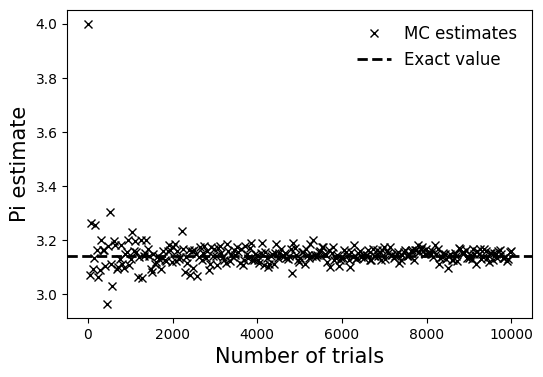

In [12]:
throws1 = np.linspace(10, 10_000, 300)
pi_values1 = [area_calc(r, int(throw))[-2] for throw in throws1]
plt.figure(figsize=(6, 4))
plt.plot(throws1, pi_values1, "x", label="MC estimates", color="black")
plt.xlabel("Number of trials", fontsize=15)
plt.ylabel("Pi estimate", fontsize=15)
plt.axhline(np.pi, ls="dashed", color="black", lw=2, label="Exact value")
plt.legend(fontsize=12, frameon=False)
plt.show()